In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# For visuals
import warnings
warnings.filterwarnings('ignore')
sns.set(style='whitegrid')


In [3]:
df = pd.read_csv("customer_data.csv")
df.head()

,CustomerID,Age,Gender,Annual_Income,Spending_Score,Purchased
0,1,22,Male,30000,39,0
1,2,35,Female,48000,81,1
2,3,26,Female,35000,6,0
3,4,45,Male,60000,77,1
4,5,29,Female,52000,40,0


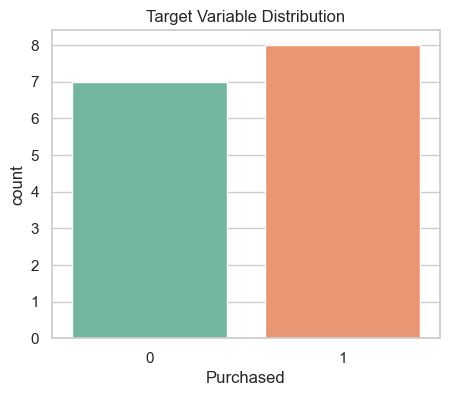

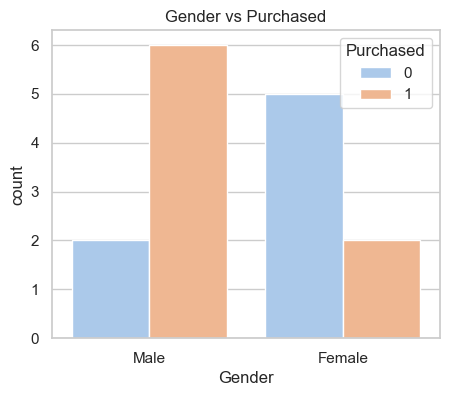

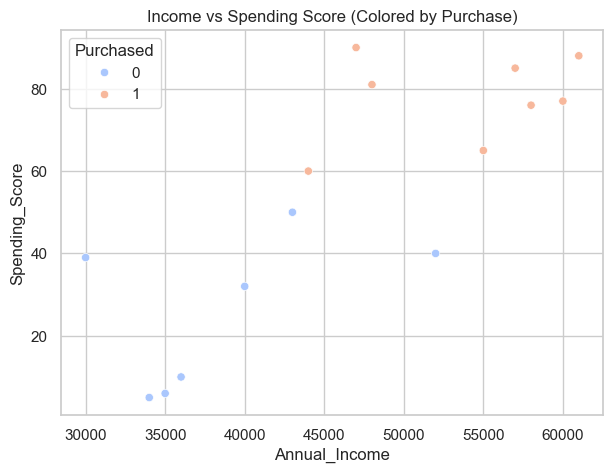

In [5]:
plt.figure(figsize=(5, 4))
sns.countplot(data=df, x='Purchased', palette='Set2')
plt.title("Target Variable Distribution")
plt.show()

plt.figure(figsize=(5, 4))
sns.countplot(data=df, x='Gender', hue='Purchased', palette='pastel')
plt.title("Gender vs Purchased")
plt.show()

plt.figure(figsize=(7, 5))
sns.scatterplot(data=df, x='Annual_Income', y='Spending_Score', hue='Purchased', palette='coolwarm')
plt.title("Income vs Spending Score (Colored by Purchase)")
plt.show()


In [7]:
le = LabelEncoder()
df['Gender'] = le.fit_transform(df['Gender'])  # Male=1, Female=0

df.drop('CustomerID', axis=1, inplace=True)

df.head()


,Age,Gender,Annual_Income,Spending_Score,Purchased
0,22,1,30000,39,0
1,35,0,48000,81,1
2,26,0,35000,6,0
3,45,1,60000,77,1
4,29,0,52000,40,0


In [9]:
X = df.drop('Purchased', axis=1)
y = df['Purchased']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [11]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [13]:
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

Accuracy Score: 1.0

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         2

    accuracy                           1.00         3
   macro avg       1.00      1.00      1.00         3
weighted avg       1.00      1.00      1.00         3



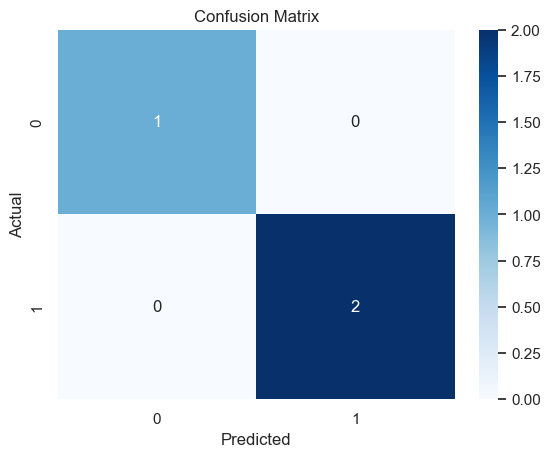

In [15]:
y_pred = model.predict(X_test)

print("Accuracy Score:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


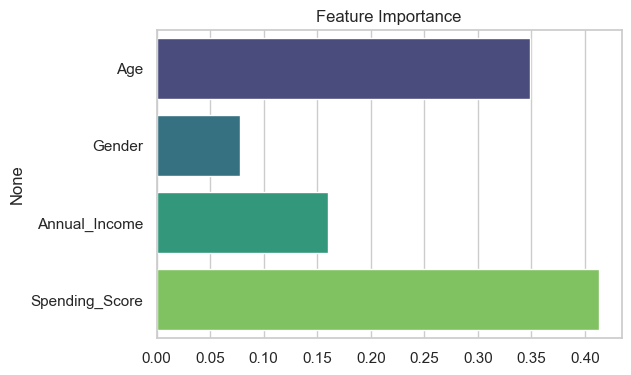

In [17]:
importances = model.feature_importances_
features = X.columns

plt.figure(figsize=(6, 4))
sns.barplot(x=importances, y=features, palette='viridis')
plt.title("Feature Importance")
plt.show()
